### Quick start with FITS
A simple image frame contains only a primary **header data unit (HDU)**. We will use **Astropy** to open it.
> Edit the path to point to *your* frame!

In [32]:
from astropy.io import fits
name = '/Users/guido/Dropbox/lectures/2019/SZ_Lyn/Autosave Image -001.fit'
hdul = fits.open(name)
hdul.info()

Filename: /Users/guido/Dropbox/lectures/2019/SZ_Lyn/Autosave Image -001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   (1108, 834)   int16 (rescales to uint16)   


The HDU contains both **metadata** (header) and **data** (image).   
The header is like a dictionary and its elements (**cards** or **keywords**) can be called by name:

In [2]:
hdr = hdul[0].header
hdr

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1108 /fastest changing axis                           
NAXIS2  =                  834 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2015-03-18T19:01:54' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   7.0000000000000000 /Exposure time in seconds                        
EXPOSURE=   7.0000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.056101000000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   16.1999999999999

In [3]:
hdr['EXPTIME']

7.0

You can modify keywords and add comments to keywords:

In [4]:
hdr['OBJECT'], hdr.comments['OBJECT']

('SZ_Lyn', '')

In [5]:
hdr['OBJECT'] = 'V* SZ Lyn'
hdr.comments['OBJECT'] = 'Variable Star of delta Sct type'
hdr['OBJECT'], hdr.comments['OBJECT']

('V* SZ Lyn', 'Variable Star of delta Sct type')

The image is an **array** and its pixels can be addressed by index:

In [6]:
img = hdul[0].data
img

array([[2122, 2093, 2054, ..., 2047, 1947, 2011],
       [2222, 2146, 2102, ..., 1981, 1947, 1952],
       [2046, 2100, 2137, ..., 1961, 1944, 2049],
       ...,
       [1846, 1913, 1921, ..., 1915, 1957, 1844],
       [1913, 1861, 1840, ..., 1861, 1918, 1865],
       [1929, 2046, 1875, ..., 1936, 1932, 1856]], dtype=uint16)

In [7]:
img[0][0]

2122

You can of course save your changes (in a new frame, possibly):

In [8]:
hdul.writeto('new_frame.fits', overwrite=True)
hdul_test = fits.open('new_frame.fits')
hdul_test[0].header['OBJECT']

'V* SZ Lyn'

### Learn how to speak array
An image is (quite obviously) a **2-d matrix** of pixels. You can think of it as an **array of (sub-)arrays**. Each sub-array is a row of pixels. The array of all rows is the whole matrix. ```shape``` gives the size of the matrix (rows times columns).

In [9]:
img.shape

(834, 1108)

A sub-array can be called with a single index: 

In [10]:
row0 = img[0]
row0

array([2122, 2093, 2054, ..., 2047, 1947, 2011], dtype=uint16)

Then you can call an element (or a slice) of the sub-array:

In [11]:
row0[2]

2054

In [12]:
row0[::2]

array([2122, 2054, 2114, 2050, 2091, 2066, 2023, 2013, 2104, 2111, 1973,
       1927, 1947, 1978, 1884, 1970, 1992, 1983, 1970, 1897, 1852, 1958,
       1899, 1902, 1953, 1989, 1991, 1882, 1919, 1949, 1905, 1898, 1841,
       1922, 1897, 1699, 1792, 1873, 1803, 1904, 1837, 1870, 1795, 1910,
       1888, 1749, 1968, 1867, 1837, 1825, 1845, 1880, 1789, 1835, 1821,
       1839, 1830, 1911, 1829, 1873, 1841, 1753, 1912, 1867, 1942, 1824,
       1801, 1857, 1848, 1763, 1839, 1857, 1846, 1769, 1869, 1728, 1794,
       1821, 1762, 1742, 1778, 1769, 1810, 1813, 1808, 1865, 1797, 1810,
       1664, 1758, 1791, 1805, 1809, 1783, 1879, 1733, 1740, 1708, 1744,
       1848, 1833, 1755, 1854, 1805, 1781, 1858, 1880, 1710, 1810, 1727,
       1761, 1831, 1769, 1784, 1748, 1785, 1807, 1803, 1847, 1843, 1777,
       1771, 1774, 1816, 1801, 1792, 1809, 1796, 1725, 1742, 1797, 1738,
       1765, 1752, 1678, 1681, 1744, 1841, 1844, 1810, 1796, 1769, 1743,
       1744, 1778, 1729, 1723, 1843, 1830, 1721, 17

You can do the same with two indices:

In [13]:
img[0][2], img[0,2]

(2054, 2054)

Notice that using two sets of brackets is *not* the same as using one. Each set of brackets is applied *after* the previous one, while operations within brackets are performed *all at once*.

In [14]:
img[0][:], img[0,:]

(array([2122, 2093, 2054, ..., 2047, 1947, 2011], dtype=uint16),
 array([2122, 2093, 2054, ..., 2047, 1947, 2011], dtype=uint16))

In [15]:
img[:][0], img[:,0]

(array([2122, 2093, 2054, ..., 2047, 1947, 2011], dtype=uint16),
 array([2122, 2222, 2046, 2155, 2047, 2073, 2108, 2046, 2069, 2037, 2098,
        1981, 2139, 2095, 2116, 2063, 2050, 1973, 1949, 2006, 2067, 2048,
        2152, 2102, 1946, 2072, 1997, 2041, 1998, 2018, 2013, 1937, 1966,
        1985, 1953, 1981, 2110, 2050, 1963, 2142, 1952, 1975, 2021, 2047,
        1967, 2003, 1998, 2077, 2024, 1957, 1906, 1900, 2022, 2040, 1892,
        1979, 2038, 2030, 2042, 2083, 2004, 1918, 1918, 1922, 2074, 1995,
        1992, 1946, 1943, 2000, 2006, 2023, 1944, 1924, 1993, 1919, 1996,
        2087, 1869, 2029, 1966, 1989, 2066, 1929, 1975, 1917, 1993, 1992,
        2040, 1951, 1941, 1907, 1944, 1974, 1924, 2079, 1977, 2076, 1984,
        2032, 1915, 2018, 1970, 1923, 2077, 2029, 2018, 2008, 1936, 1974,
        1961, 1891, 2046, 1944, 1981, 1986, 2049, 1979, 2072, 1870, 2013,
        1941, 1899, 1976, 1971, 1953, 2021, 2048, 1966, 1936, 1917, 1956,
        1954, 2030, 1986, 1919, 1915, 2002, 209

### A plot is worth a thousand printouts
We will use **Matplotlib** to visualize data.

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

To extract a sub-image, you can slice the array:

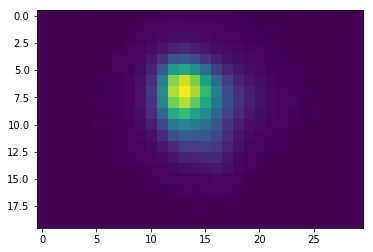

In [17]:
sub_img = img[510:530, 630:660]
plt.imshow(sub_img)
plt.show()

You can use ```figure``` to create a new figure instead of overplotting it. ```show``` is used just at the end to display all figures. Compare:

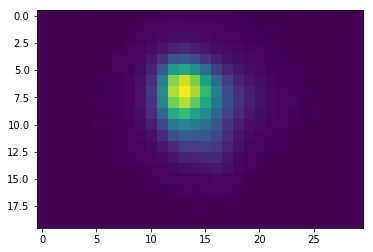

In [18]:
plt.imshow(img)
plt.imshow(sub_img)
...
plt.show()  # Only last image is shown

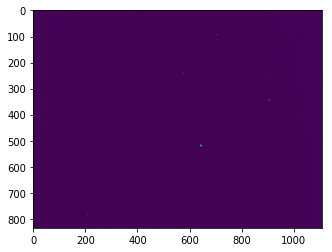

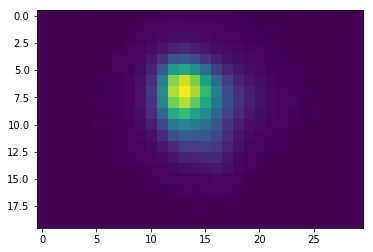

In [19]:
plt.figure()  # First figure
plt.imshow(img)
plt.figure()  # Second figure
plt.imshow(sub_img)
...
plt.show()  # All images are shown in separate figures

Based on the above example, let's make a simple function to plot a list of images (*bigger* images, with added colorbar and axis labels):

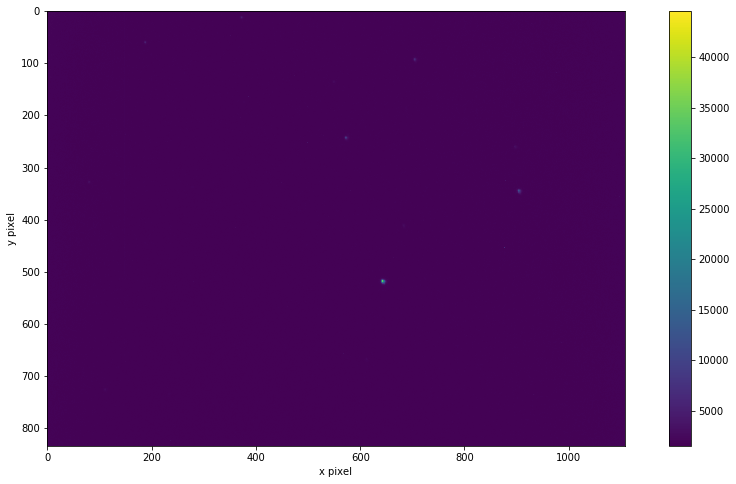

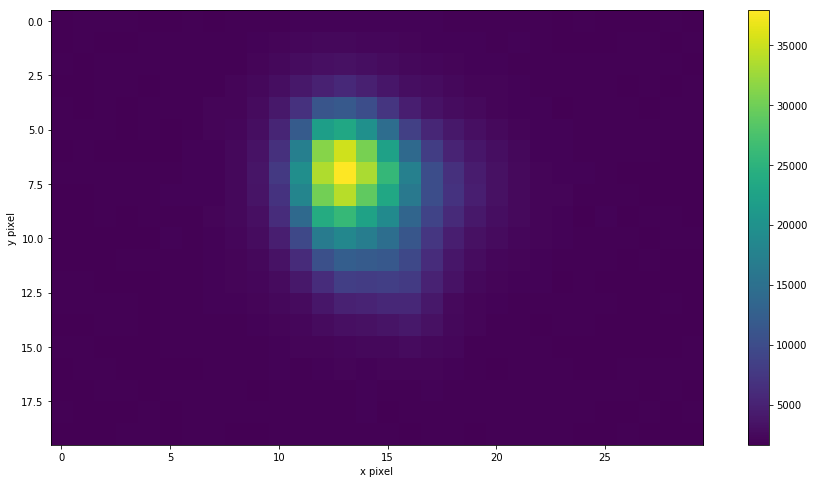

In [20]:
def plot_list(imgs):
    for i in imgs:
        plt.figure(figsize=(16,8))
        plt.imshow(i)
        plt.colorbar()
        plt.xlabel('x pixel')
        plt.ylabel('y pixel')
    plt.show()
plot_list([img, sub_img])

Beware that the input to this particular function *must* be a list, even if you want to plot a single image:

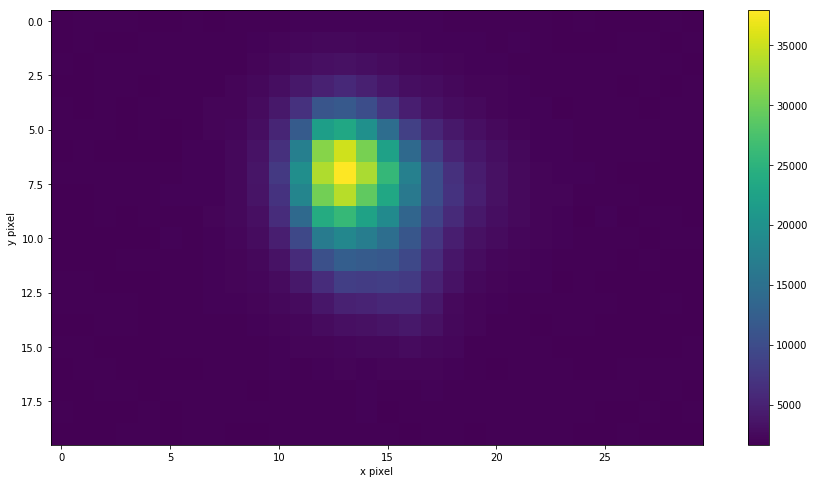

In [21]:
#plot_list(sub_img)  # WRONG!
plot_list([sub_img])

```imshow``` works only with 2-d matrices (images). To plot simple arrays (like image rows or columns), use ```plot``` for a continuous plot or ```scatter``` for a scatter plot:

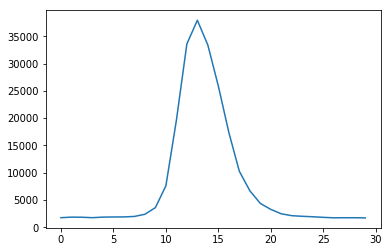

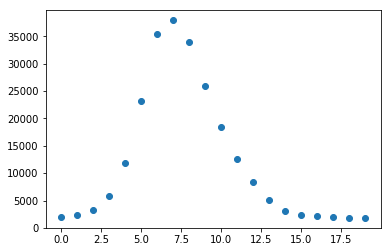

In [22]:
row = sub_img[7,:]
col = sub_img[:,13]
row_range = range(sub_img.shape[1])
col_range = range(sub_img.shape[0])
plt.figure()
plt.plot(row_range, row)
plt.figure()
plt.scatter(col_range, col)
plt.show()

Let's improve our plotting function to work with both rows/columns and full images. Note that the part that makes the plot (```plot```) has been splitted from the part that loops through all arrays (```plot_list```):

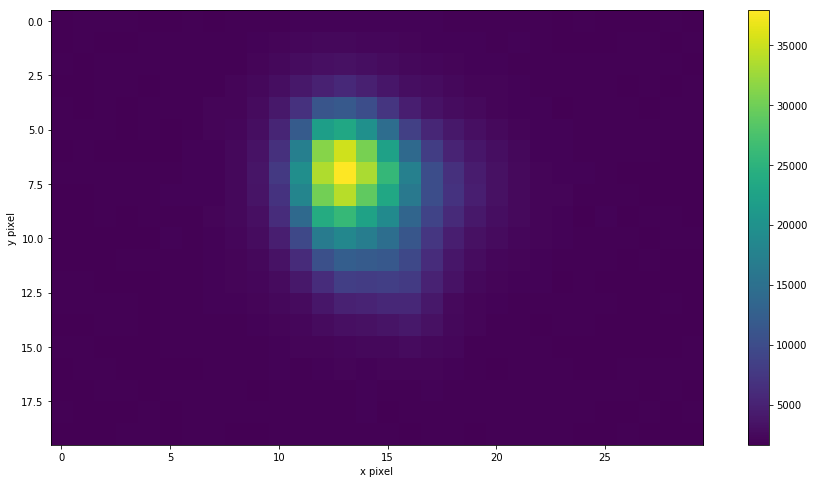

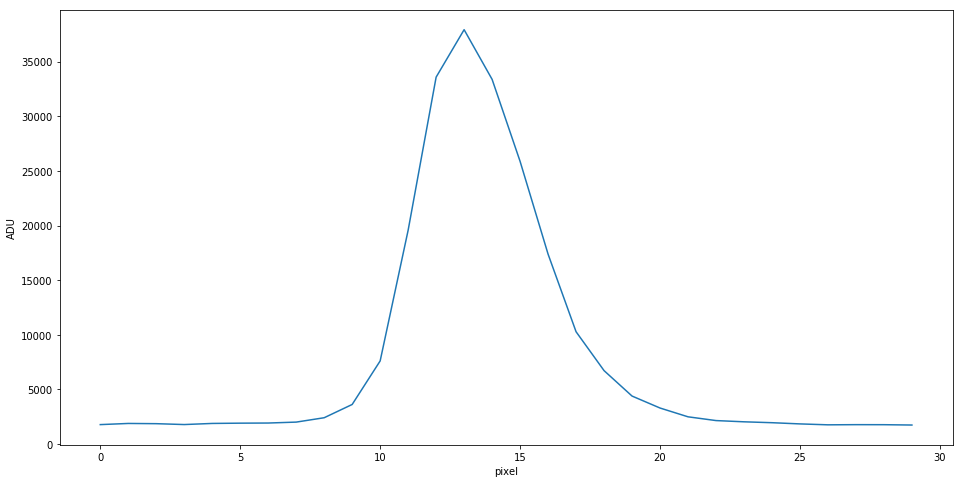

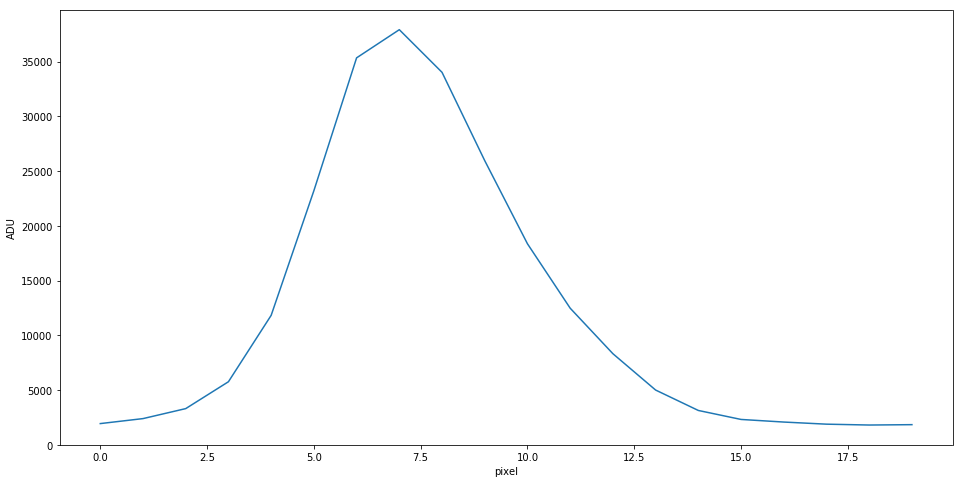

In [23]:
def plot_list(arrs):
    for a in arrs:
        plt.figure(figsize=(16,8))
        plot(a)
    plt.show()

def plot(arr):
    if len(arr.shape) == 1:
        plt.plot(range(len(arr)), arr)
        plt.xlabel('pixel')
        plt.ylabel('ADU')
    elif len(arr.shape) == 2:
        plt.imshow(arr)
        plt.colorbar()
        plt.xlabel('x pixel')
        plt.ylabel('y pixel')
    else:
        pass


col = sub_img[:,13]
plot_list([sub_img, row, col])

> **Your turn now**: write the code to extract a 11x11-pixel window centered in (7, 13) from ```sub_img``` and to plot in separate figures all the rows and columns of this new sub image.

### And now for some serious data crunching
We will use **NumPy** to do statistics on arrays. A simple test case: find the global maximum of an array (remember from analysis: the *maximum point* is the index where the array reaches its *maximum value*).  

In [24]:
import numpy as np
row_mv = np.max(row) 
row_mp = np.argmax(row)
row_mv, row_mp

(37914, 13)

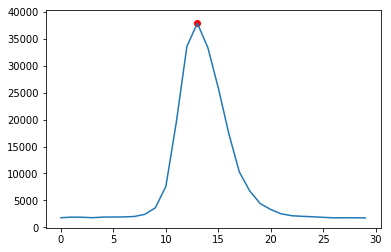

In [25]:
plt.plot(range(len(row)), row)
plt.scatter(row_mp, row_mv, color='r') 
plt.show()

You can use ```where``` to check the result:

In [26]:
np.where(row==row_mv)

(array([13]),)

In the case of an image, ```argmax``` returns the maximum point of the flattened array (i.e. the array obtained by concatenating all rows):

In [27]:
sub_img_mv = np.max(sub_img)
sub_img_mp = np.argmax(sub_img)
sub_img_mv, sub_img_mp

(37914, 223)

To obtain a 2-tuple with the row and column of the maximum point, you have to ‘unravel’ the result onto the shape of the array: 

In [28]:
(sub_img_mrow, sub_img_mcol) = np.unravel_index(np.argmax(sub_img), sub_img.shape)
sub_img_mrow, sub_img_mcol

(7, 13)

You obtain something similar with ```where```:

In [29]:
np.where(sub_img==sub_img_mv)

(array([7]), array([13]))

Let's again improve our plotting function to display also the maximum point (and maximum value, for single arrays). Note that we can redefine ```plot``` without changing ```plot_list```:

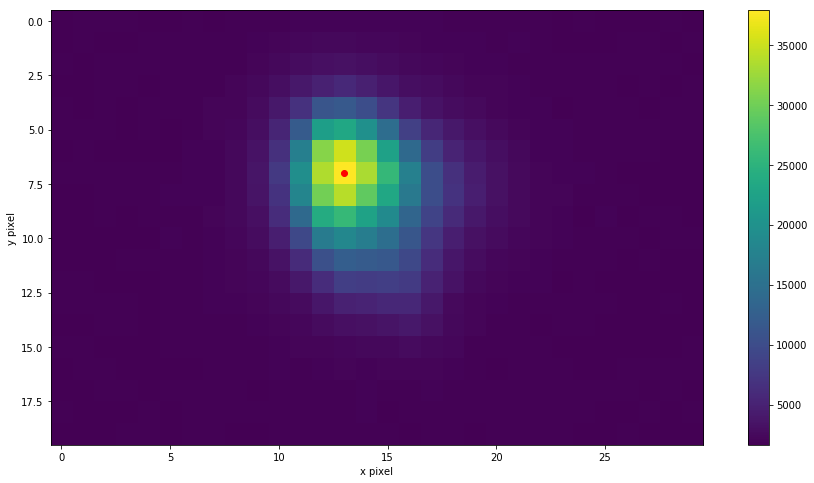

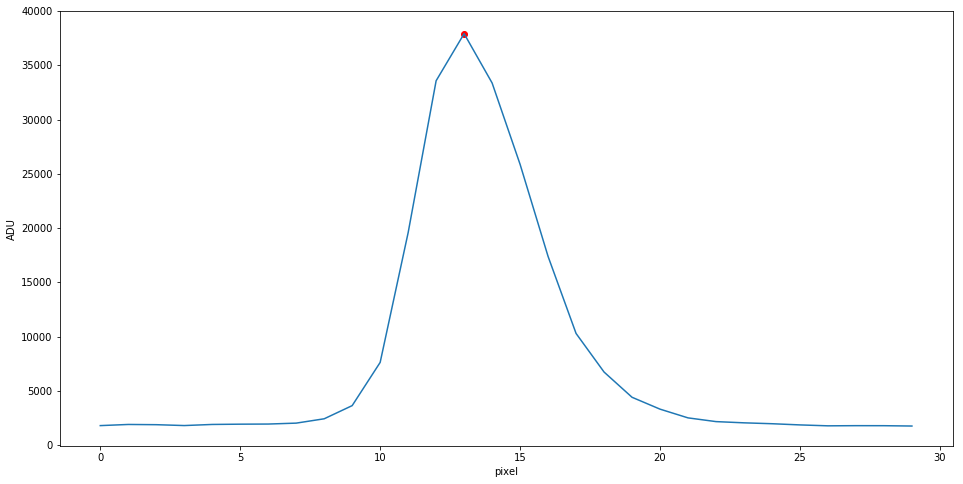

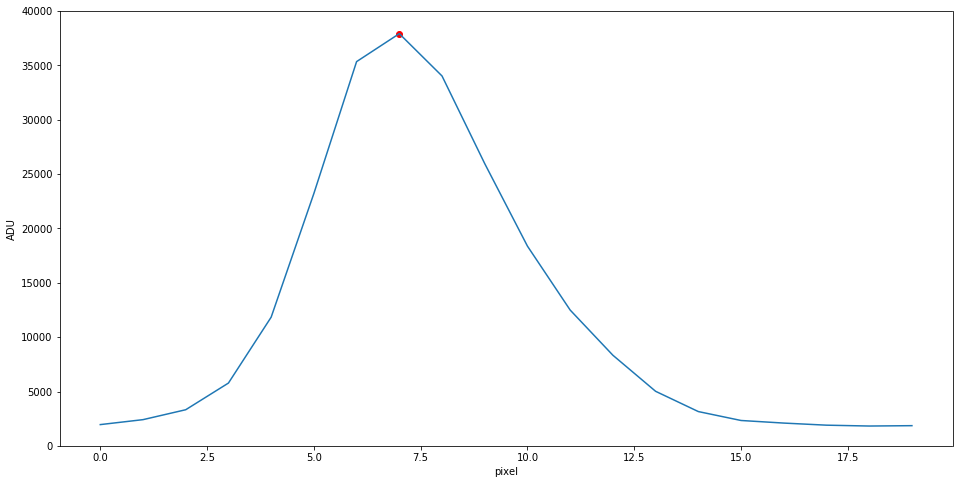

In [30]:
def argmax(arr):
    if len(arr.shape) == 1:
        return np.argmax(arr)
    else:
        return np.unravel_index(np.argmax(arr), arr.shape)

def plot(arr):
    am = argmax(arr)
    if len(arr.shape) == 1:
        plt.plot(range(len(arr)), arr)
        plt.scatter(am, np.max(arr), color='r')  # In 1-d, we plot location and maximum value
        plt.xlabel('pixel')
        plt.ylabel('ADU')
    elif len(arr.shape) == 2:
        plt.imshow(arr)
        plt.colorbar()
        plt.scatter(am[1], am[0], color='r')  # In 2-d, we only plot location
        plt.xlabel('x pixel')
        plt.ylabel('y pixel')
    else:
        pass
    
plot_list([sub_img, row, col])

> **Your turn now**: with help from the NumPy Reference (https://docs.scipy.org/doc/numpy-1.16.1/reference/), compute the arithmetic mean and the median of ```sub_img```. What can we infer from the difference between the two values? **Extra points**: compute the median of each rows of ```img``` separately and plot all the values as a function of the row index.